In [1]:
import pandas as pd
df = pd.read_csv("/Users/sujiaqi/Desktop/IE580/creditcard.csv")
df = df.dropna(how = 'any', axis = 0)#drop row with na data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#General description of data
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [3]:
#check numbers of two classes
print ("Fraud Transaction Number:")
print (df.Class[df.Class == 1].count())
print ("Normal Transaction Number:")
print (df.Class[df.Class == 0].count())

Fraud Transaction Number:
492
Normal Transaction Number:
284315


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#heat map
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 5},
            yticklabels=df.columns,
            xticklabels=df.columns, ax=ax)
plt.savefig('heatmap.png', dpi=300)
plt.show()

<Figure size 1800x1800 with 2 Axes>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#preprocessing
X = df.iloc[:, :-1].values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=1)

#Standardize
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#using oversample to deal with data
#and then use relu and hardsigmoid model
#combined with sgd and adam optimizer
#plot validation score, confusion matrix and rocauc

#use smote to oversample in order to avoid overfitting
sm = SMOTE(1,random_state=1)
X_resample,y_resample = sm.fit_resample(X_train,y_train)

In [6]:
#preparation for use of loss function 'categorical_crossentropy'
from tensorflow.keras.utils import to_categorical
y_resample = to_categorical(y_resample)
y_test = to_categorical(y_test)

#relu model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model_relu = Sequential()
model_relu.add(Dense(50,input_dim=X_resample.shape[1],activation='relu'))
model_relu.add(Dense(32,activation='relu'))
model_relu.add(Dense(2,activation='softmax'))

In [7]:
#add callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

#train
model_relu.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_training = model_relu.fit(X_resample, y_resample,epochs = 10, validation_split = .2,callbacks = [early_stopping_monitor])

Train on 409412 samples, validate on 102354 samples
Epoch 1/10
409412/409412 [==============================] - 12s 30us/sample - loss: 0.0650 - accuracy: 0.9765 - val_loss: 0.0463 - val_accuracy: 0.9809
Epoch 2/10
409412/409412 [==============================] - 12s 29us/sample - loss: 0.0211 - accuracy: 0.9946 - val_loss: 0.0266 - val_accuracy: 0.9933
Epoch 3/10
409412/409412 [==============================] - 12s 29us/sample - loss: 0.0118 - accuracy: 0.9976 - val_loss: 0.0111 - val_accuracy: 0.9993
Epoch 4/10
409412/409412 [==============================] - 12s 29us/sample - loss: 0.0084 - accuracy: 0.9983 - val_loss: 0.0076 - val_accuracy: 0.9998
Epoch 5/10
409412/409412 [==============================] - 12s 29us/sample - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 6/10
409412/409412 [==============================] - 12s 30us/sample - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9999
Epoch 7/10
409412/409412 [==========

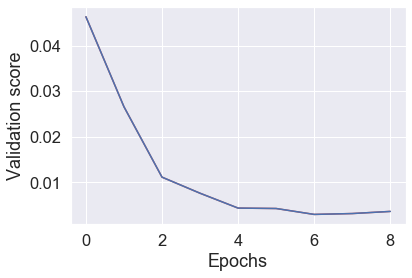

In [8]:
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

[[28399    33]
 [   10    39]]


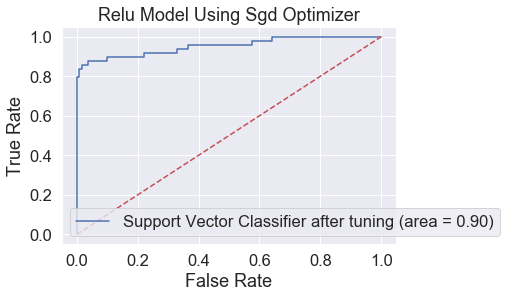

In [9]:
#prediction
y_pred = model_relu.predict(X_test)

#draw confusion matrix
from sklearn.metrics import confusion_matrix
label_predict = np.argmax(y_pred, axis=1)
label = np.argmax(y_test, axis=1)
print(confusion_matrix(label, label_predict))

#rocauc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_tuning = roc_auc_score(label, label_predict)
probability_predict = y_pred[:,1]
x_label, y_label, thresholds = roc_curve(label, probability_predict)
plt.figure()
plt.plot(x_label, y_label, label='Support Vector Classifier after tuning (area = %0.2f)' % roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower left")
plt.title('Relu Model Using Sgd Optimizer')
plt.xlabel('False Rate')
plt.ylabel('True Rate')
plt.show()

In [10]:
#use optimazer adam
model_relu.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_training = model_relu.fit(X_resample, y_resample,epochs = 10, validation_split = .2,callbacks = [early_stopping_monitor])

Train on 409412 samples, validate on 102354 samples
Epoch 1/10
409412/409412 [==============================] - 13s 32us/sample - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/10
409412/409412 [==============================] - 13s 33us/sample - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 3/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.0036 - accuracy: 0.9992 - val_loss: 8.9442e-04 - val_accuracy: 0.9999
Epoch 4/10
409412/409412 [==============================] - 13s 32us/sample - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0154 - val_accuracy: 0.9962
Epoch 5/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9996


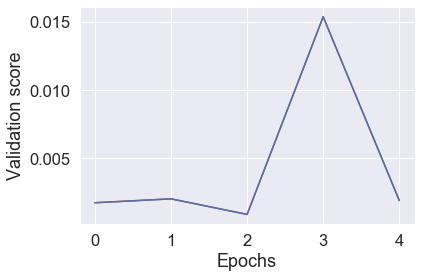

In [11]:
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

[[28401    31]
 [    9    40]]


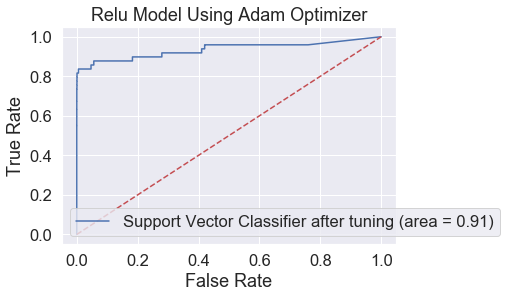

In [12]:
#prediction
y_pred = model_relu.predict(X_test)

#draw confusion matrix
label_predict = np.argmax(y_pred, axis=1)
label = np.argmax(y_test, axis=1)
print(confusion_matrix(label, label_predict))

#rocauc
roc_auc_tuning = roc_auc_score(label, label_predict)
probability_predict = y_pred[:,1]
x_label, y_label, thresholds = roc_curve(label, probability_predict)
plt.figure()
plt.plot(x_label, y_label, label='Support Vector Classifier after tuning (area = %0.2f)' % roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower left")
plt.title('Relu Model Using Adam Optimizer')
plt.xlabel('False Rate')
plt.ylabel('True Rate')
plt.show()

In [13]:
#hard sigmoid model
model_hsig = Sequential()
model_hsig.add(Dense(50,input_dim=X_resample.shape[1],activation='hard_sigmoid'))
model_hsig.add(Dense(32,activation='hard_sigmoid'))
model_hsig.add(Dense(2,activation='softmax'))

In [14]:
#use optimazer sgd
model_hsig.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_training = model_hsig.fit(X_resample, y_resample,epochs = 10, validation_split = .2,callbacks = [early_stopping_monitor])

Train on 409412 samples, validate on 102354 samples
Epoch 1/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.1615 - accuracy: 0.9430 - val_loss: 0.1889 - val_accuracy: 0.9072
Epoch 2/10
409412/409412 [==============================] - 12s 30us/sample - loss: 0.1129 - accuracy: 0.9578 - val_loss: 0.1832 - val_accuracy: 0.9151
Epoch 3/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.1058 - accuracy: 0.9613 - val_loss: 0.1655 - val_accuracy: 0.9283
Epoch 4/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.1008 - accuracy: 0.9641 - val_loss: 0.1675 - val_accuracy: 0.9309
Epoch 5/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.0967 - accuracy: 0.9656 - val_loss: 0.1587 - val_accuracy: 0.9347
Epoch 6/10
409412/409412 [==============================] - 13s 31us/sample - loss: 0.0930 - accuracy: 0.9667 - val_loss: 0.1463 - val_accuracy: 0.9396
Epoch 7/10
409412/409412 [==========

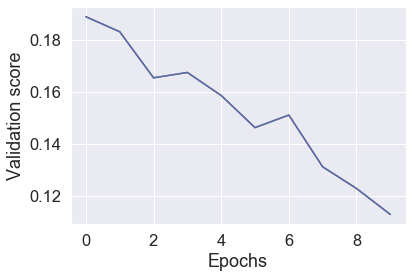

In [15]:
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

[[28011   421]
 [    7    42]]


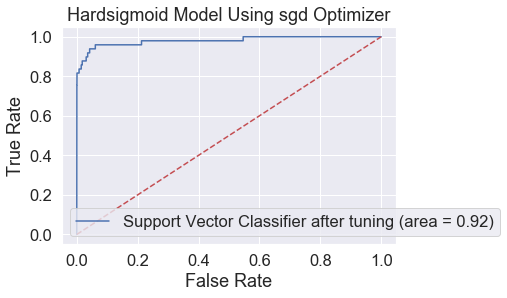

In [16]:
#prediction
y_pred = model_hsig.predict(X_test)

#draw confusion matrix
label_predict = np.argmax(y_pred, axis=1)
label = np.argmax(y_test, axis=1)
print(confusion_matrix(label, label_predict))

#rocauc
roc_auc_tuning = roc_auc_score(label, label_predict)
probability_predict = y_pred[:,1]
x_label, y_label, thresholds = roc_curve(label, probability_predict)
plt.figure()
plt.plot(x_label, y_label, label='Support Vector Classifier after tuning (area = %0.2f)' % roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower left")
plt.title('Hardsigmoid Model Using sgd Optimizer')
plt.xlabel('False Rate')
plt.ylabel('True Rate')
plt.show()

In [17]:
#use optimazer adam
model_hsig.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_training = model_hsig.fit(X_resample, y_resample,epochs = 10, validation_split = .2,callbacks = [early_stopping_monitor])

Train on 409412 samples, validate on 102354 samples
Epoch 1/10
409412/409412 [==============================] - 14s 35us/sample - loss: 0.0494 - accuracy: 0.9821 - val_loss: 0.0518 - val_accuracy: 0.9784
Epoch 2/10
409412/409412 [==============================] - 14s 33us/sample - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0097 - val_accuracy: 0.9977
Epoch 3/10
409412/409412 [==============================] - 14s 34us/sample - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 4/10
409412/409412 [==============================] - 14s 33us/sample - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0097 - val_accuracy: 0.9975
Epoch 5/10
409412/409412 [==============================] - 14s 34us/sample - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0011 - val_accuracy: 0.9999
Epoch 6/10
409412/409412 [==============================] - 14s 34us/sample - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 7/10
409412/409412 [==========

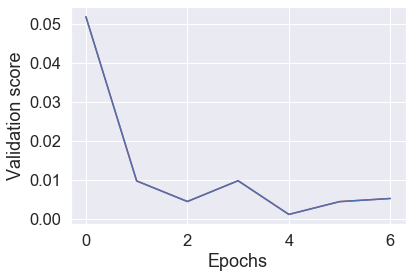

In [18]:
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

[[28411    21]
 [   11    38]]


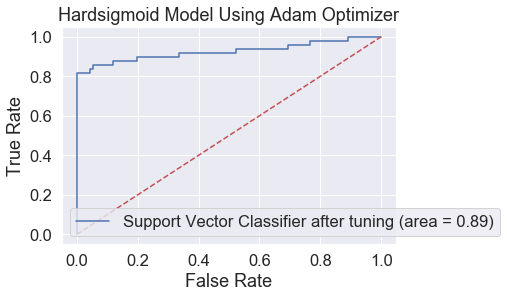

In [19]:
#prediction
y_pred = model_hsig.predict(X_test)

#draw confusion matrix
label_predict = np.argmax(y_pred, axis=1)
label = np.argmax(y_test, axis=1)
print(confusion_matrix(label, label_predict))

#rocauc
roc_auc_tuning = roc_auc_score(label, label_predict)
probability_predict = y_pred[:,1]
x_label, y_label, thresholds = roc_curve(label, probability_predict)
plt.figure()
plt.plot(x_label, y_label, label='Support Vector Classifier after tuning (area = %0.2f)' % roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower left")
plt.title('Hardsigmoid Model Using Adam Optimizer')
plt.xlabel('False Rate')
plt.ylabel('True Rate')
plt.show()